# Project 2: Linear Regression

We are going to build a Linear Regression model for Medical cost dataset.

It is a supervised Learning algorithm where the target variable is real number.

Establish a relationship betwenn the dependant variable (y) using one or more independant variables (x).

## **Problem Statement:**

- independant var : x1 , x2, x3,..
- dependant var : y1



```
y1 = b0 + b1*x1 + b2*x2 + ...
```
Predict the medical charges of a individual based on given parameters,


### Step 1: import Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv('/content/insurance.csv')

In [3]:
# view the first 3 rows
df.head(3)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.9240
1,18,male,33.77,1,no,southeast,1725.5523
2,28,male,33.00,3,no,southeast,4449.4620


In [4]:
df.tail(2)

,age,sex,bmi,children,smoker,region,charges
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [5]:
#shape of dataframe
df.shape

(1338, 7)

# step 2: Visualizing data

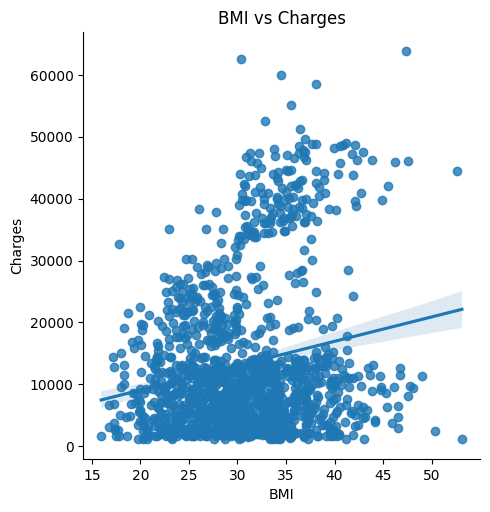

In [7]:
# x = bmi  y= charges

sns.lmplot(data=df,x='bmi',y='charges')
plt.xlabel('BMI')
plt.ylabel('Charges')
plt.title('BMI vs Charges')
plt.show()

# Step 3 : EDA

In [8]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [9]:
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

<ipython-input-15-30a073be47e8>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['charges'],bins=50,color='r', ax=ax)
<ipython-input-15-30a073be47e8>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.log10(df['charges']),bins=50,color='g', ax=ax)


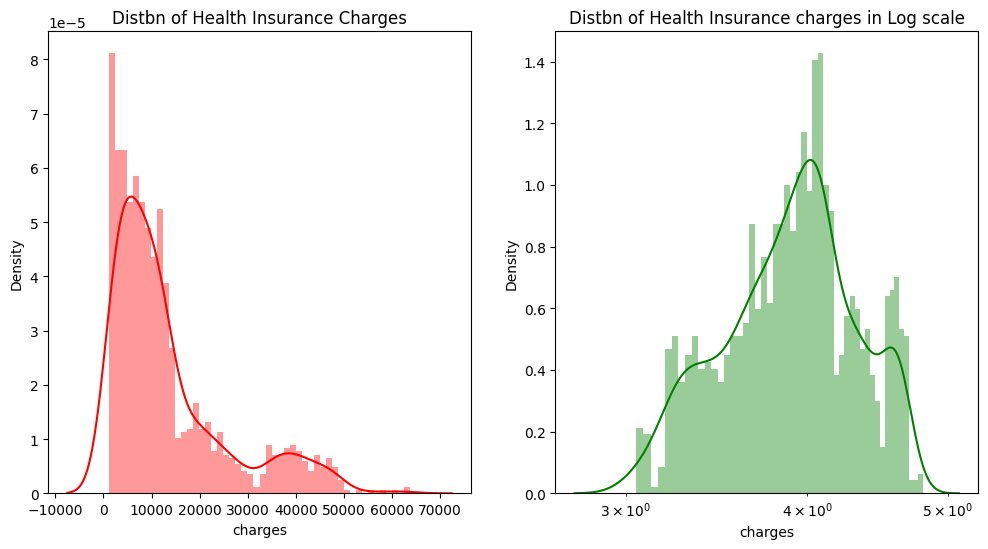

In [15]:
fig = plt.figure(figsize=(12,6))

ax = fig.add_subplot(121)  # 1 row, 2 col, 1st plot
sns.distplot(df['charges'],bins=50,color='r', ax=ax)
ax.set_title('Distbn of Health Insurance Charges')

ax = fig.add_subplot(122)
sns.distplot(np.log10(df['charges']),bins=50,color='g', ax=ax)
ax.set_title('Distbn of Health Insurance charges in Log scale')
ax.set_xscale('log')
plt.show()

<ipython-input-18-75cb7c08e582>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='sex', y='charges',data=df,ax=ax,palette='Set1')
<ipython-input-18-75cb7c08e582>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='smoker', y='charges',data=df,ax=ax,palette='magma')


Text(0.5, 1.0, 'Distribution of charges for smoker')

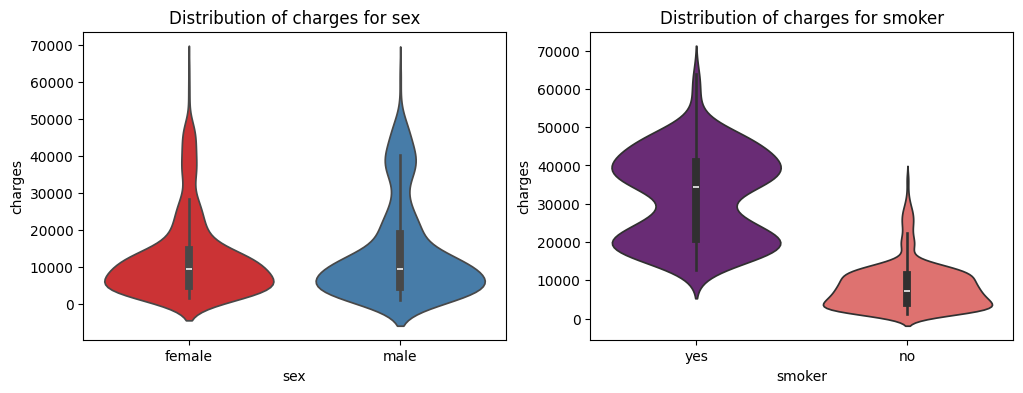

In [18]:
fig = plt.figure(figsize=(12,4))
ax = fig.add_subplot(121)
sns.violinplot(x='sex', y='charges',data=df,ax=ax,palette='Set1')
ax.set_title('Distribution of charges for sex')

ax = fig.add_subplot(122)
sns.violinplot(x='smoker', y='charges',data=df,ax=ax,palette='magma')
ax.set_title('Distribution of charges for smoker')

<Axes: xlabel='children', ylabel='charges'>

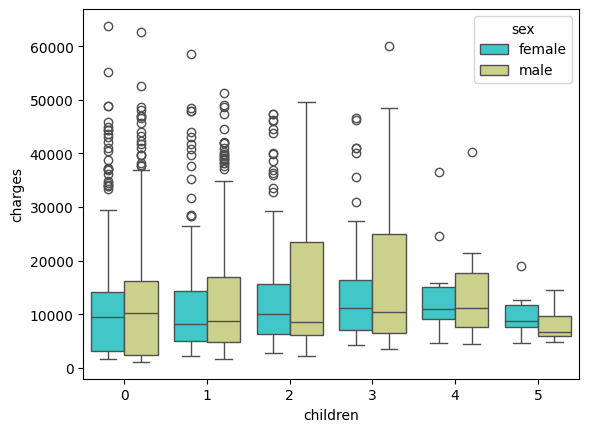

In [19]:
sns.boxplot(x='children',y='charges',data=df,hue='sex',palette='rainbow')

In [22]:
# create a sub-dataframe of only 2 column:  ['children','charges']
df_1 = df[['children','charges']]

df_1.groupby('children').agg(['mean','min','max'])

charges                        
                  mean        min          max
children                                      
0         12365.975602  1121.8739  63770.42801
1         12731.171832  1711.0268  58571.07448
2         15073.563734  2304.0022  49577.66240
3         15355.318367  3443.0640  60021.39897
4         13850.656311  4504.6624  40182.24600
5          8786.035247  4687.7970  19023.26000

<Axes: xlabel='region', ylabel='charges'>

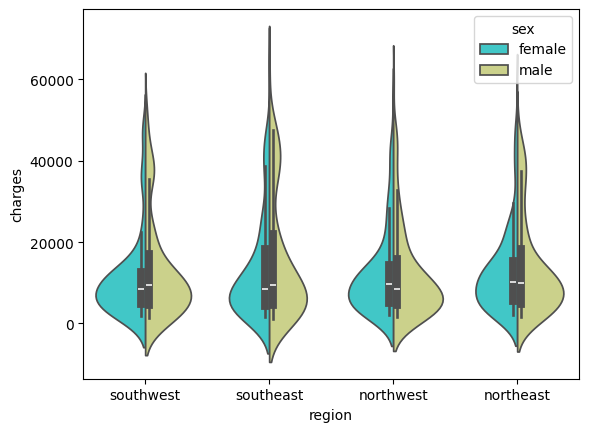

In [23]:
sns.violinplot(x='region',y='charges',data=df,palette='rainbow',hue='sex',split=True)

Text(0.5, 1.0, 'BMI vs Charges')

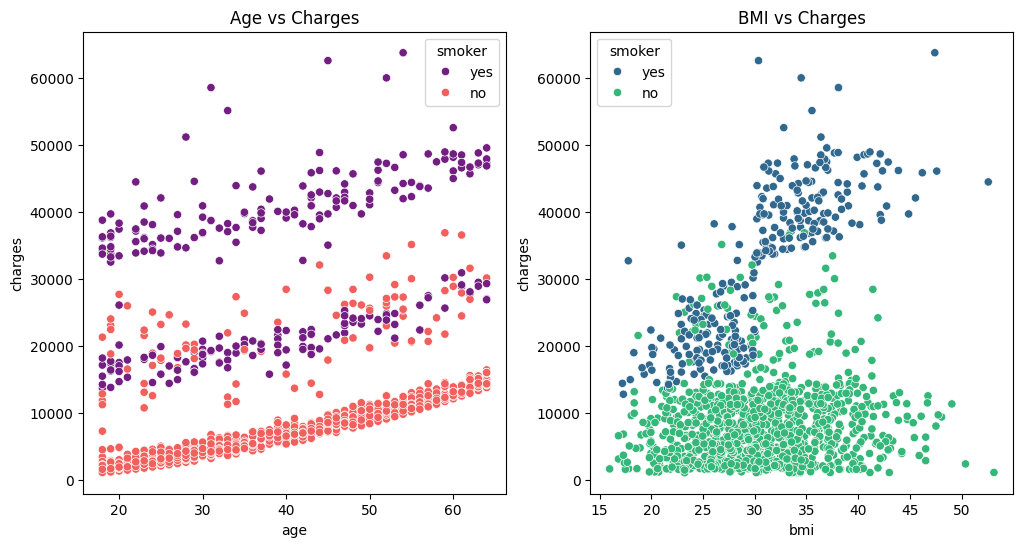

In [24]:
fig = plt.figure(figsize=(12,6))
ax=fig.add_subplot(121)
sns.scatterplot(data=df,x='age',y='charges',palette='magma',hue='smoker',ax=ax)
ax.set_title('Age vs Charges')

ax=fig.add_subplot(122)
sns.scatterplot(data=df,x='bmi',y='charges',palette='viridis',hue='smoker',ax=ax)
ax.set_title('BMI vs Charges')

# 3. Pre-processing

We need to convert Categorical ddata into numerical data:

1. One hot encoding
2. Label Encoding

In [25]:
cat_columns=['sex','children','smoker','region']

df_encode = pd.get_dummies(data=df,columns=cat_columns,drop_first=True,prefix='OHE',prefix_sep='_')
df_encode.head()

,age,bmi,charges,OHE_male,OHE_1,OHE_2,OHE_3,OHE_4,OHE_5,OHE_yes,OHE_northwest,OHE_southeast,OHE_southwest
0,19,27.900,16884.92400,False,False,False,False,False,False,True,False,False,True
1,18,33.770,1725.55230,True,True,False,False,False,False,False,False,True,False
2,28,33.000,4449.46200,True,False,False,True,False,False,False,False,True,False
3,33,22.705,21984.47061,True,False,False,False,False,False,False,True,False,False
4,32,28.880,3866.85520,True,False,False,False,False,False,False,True,False,False


In [26]:
df_encode.shape

(1338, 13)

In [27]:
#box-cox transformation

from scipy.stats import boxcox

y_bc,lam,ci = boxcox(df_encode['charges'],alpha=0.05)

In [29]:
df_encode['charges'] = np.log(df_encode['charges'])

df_encode.head()

,age,bmi,charges,OHE_male,OHE_1,OHE_2,OHE_3,OHE_4,OHE_5,OHE_yes,OHE_northwest,OHE_southeast,OHE_southwest
0,19,27.900,2.275643,False,False,False,False,False,False,True,False,False,True
1,18,33.770,2.008657,True,True,False,False,False,False,False,False,True,False
2,28,33.000,2.128296,True,False,False,True,False,False,False,False,True,False
3,33,22.705,2.302394,True,False,False,False,False,False,False,True,False,False
4,32,28.880,2.111448,True,False,False,False,False,False,False,True,False,False


In [30]:
from sklearn.model_selection import train_test_split

X = df_encode.drop('charges',axis=1)  # all columns except 'charges'
y = df_encode['charges']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [31]:
X_train

,age,bmi,OHE_male,OHE_1,OHE_2,OHE_3,OHE_4,OHE_5,OHE_yes,OHE_northwest,OHE_southeast,OHE_southwest
332,61,31.160,False,False,False,False,False,False,False,True,False,False
355,46,27.600,True,False,False,False,False,False,False,False,False,True
138,54,31.900,False,False,False,True,False,False,False,False,True,False
381,55,30.685,True,False,False,False,False,False,True,False,False,False
292,25,45.540,True,False,True,False,False,False,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
1095,18,31.350,False,False,False,False,True,False,False,False,False,False
1130,39,23.870,False,False,False,False,False,True,False,False,True,False
1294,58,25.175,True,False,False,False,False,False,False,False,False,False
860,37,47.600,False,False,True,False,False,False,True,False,False,True


In [32]:
y_train

332     2.251836
355     2.313587
138     2.323904
381     2.365807
292     2.365381
          ...   
1095    2.131244
1130    2.203588
1294    2.239316
860     2.373869
1126    2.222630
Name: charges, Length: 936, dtype: float64

In [34]:
# convert all columns into numerical
# replace all the False with 0 and True with 1

from sklearn.linear_model import LinearRegression

X_train = X_train.replace(False,0).replace(True,1)
X_test = X_test.replace(False,0).replace(True,1)

# build linear regression model
model = LinearRegression()

# fit the model on training data
model.fit(X_train,y_train)

# predict on X_test and store the values as y_pred
y_pred = model.predict(X_test)

# compare y_pred and y_test and calculate MSE and r2score
from sklearn.metrics import mean_squared_error,r2_score

mse = mean_squared_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)

In [35]:
mse

0.002316555903827565

In [36]:
r2

0.7765441744902798